# Final Project Script

## Importing Data & Packages

In [1]:
# import packages and libraries
import pandas as pd
import numpy as np
import random as rnd

## Setting max columns and rows to allow for more values to be displayed
pd.options.display.max_rows = 40
pd.options.display.max_columns = 20

import statsmodels.api as sm
from pandas.plotting import scatter_matrix

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from scipy.stats import uniform
from prophet import Prophet

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


import io
from google.colab import files

In [2]:
housing_data = pd.read_csv('Housing.csv')

## Details About the Data
The [Housing.csv](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset) datset is from Kaggle and can be found [here](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset).

Data Dictionary:

* **price** - price of the houses
* **area** - area of the house (in sqft.)
* **bedrooms** - number of bedrooms in the house (1 - 6)
* **bathrooms** - number of bathrooms in the house (1 - 4)
* **stories** - number of floors in the house (1 - 4)
* **mainroad** - is the house connected to the main road (yes/no)
* **guestroom** - wheather there is a guest room or not (yes/no)
* **basement** - wheather the house has a basement or not (yes/no)
* **hotwaterheating** - if the house has a hot water heater
* **airconditioning** - if the house has AC
* **parking** - the number of parking spaces available within the house (0 - 3)
* **prefarea** - whether the house is located in a preferred area (yes/no)
* **furnishingstatus** - the furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished)


In [ ]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Cleaning the Data

In [ ]:
## Here are the 13 variables in the housing dataset. There are no rows with missing data that we need to worry about. Each of the variables look to be in the data type that we would want to use, however we might want to
## use one-hot-encoding for the binary variables like 'mainroad' , 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', and 'prefarea'
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
## Here is a quick snapshot, statistical summary of how each of the numerical variables look
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [3]:
## Creating the variable 'price_in_Ms' to better display the house price distribution
housing_data['price_in_Ms'] = housing_data['price']/1000000

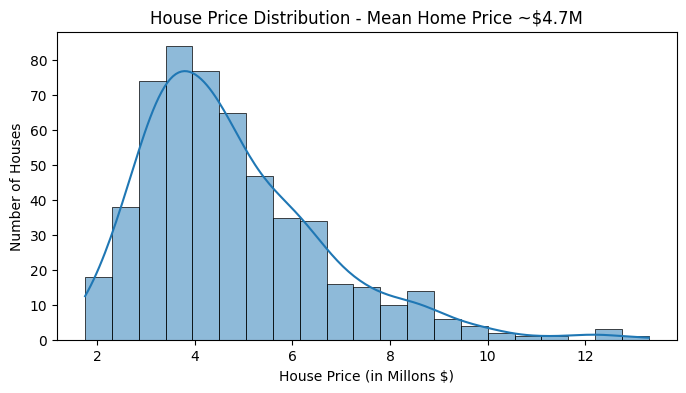

In [4]:
plt.figure(figsize=[8,4])
ax = sns.histplot(housing_data['price_in_Ms'], kde=True, linewidth=0.5)
ax.set(title='House Price Distribution - Mean Home Price ~$4.7M',
       xlabel="House Price (in Millons $)",
       ylabel="Number of Houses")
plt.show()

In [ ]:
print("Average House Price: ",'${:,.0f}'.format(housing_data['price'].mean()))

Average House Price:  $4,766,729


In [5]:
## Want to remove any houses that are outlier data points
Q1 = housing_data['price'].quantile(0.25)
Q3 = housing_data['price'].quantile(0.75)
IQR = Q3 - Q1

housing_data2 = housing_data[housing_data['price'] <= (Q3+(1.5*IQR))]
housing_data2 = housing_data2[housing_data['price'] >= (Q1-(1.5*IQR))]
housing_data2 = housing_data2.reset_index(drop=True)

<ipython-input-5-f726662b0e91>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  housing_data2 = housing_data2[housing_data['price'] >= (Q1-(1.5*IQR))]


In [6]:
housing_data2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_in_Ms
0,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,9.100
1,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,9.100
2,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished,8.960
3,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished,8.890
4,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,8.855


In [7]:
# Define which columns to convert to binary
columns_to_convert = ['mainroad' , 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Use the .replace() method to convert 'yes' to 1 and 'no' to 0 in selected columns
housing_data2[columns_to_convert] = housing_data2[columns_to_convert].replace({'yes': 1, 'no': 0})

# Convert "furnishingstatus" to numerical values ('furnished' to 3, 'semi-furnished' to 2, and 'unfurnished' to 1)
housing_data2['furnishingstatus'] = housing_data2['furnishingstatus'].replace({'furnished': 3, 'semi-furnished': 2, 'unfurnished':1})

print(housing_data2)

       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    9100000  6000         4          1        2         1          0   
1    9100000  6600         4          2        2         1          1   
2    8960000  8500         3          2        4         1          0   
3    8890000  4600         3          2        2         1          1   
4    8855000  6420         3          2        2         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
525  1820000  3000         2          1        1         1          0   
526  1767150  2400         3          1        1         0          0   
527  1750000  3620         2          1        1         1          0   
528  1750000  2910         3          1        1         0          0   
529  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           1                0                0      

# Exploring the Data

### Correlation Matrix on data before cleaning data

In [ ]:
#housing data observations
correlation_matrix=housing_data.corr()

<ipython-input-45-e71d4fb57d93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=housing_data.corr()


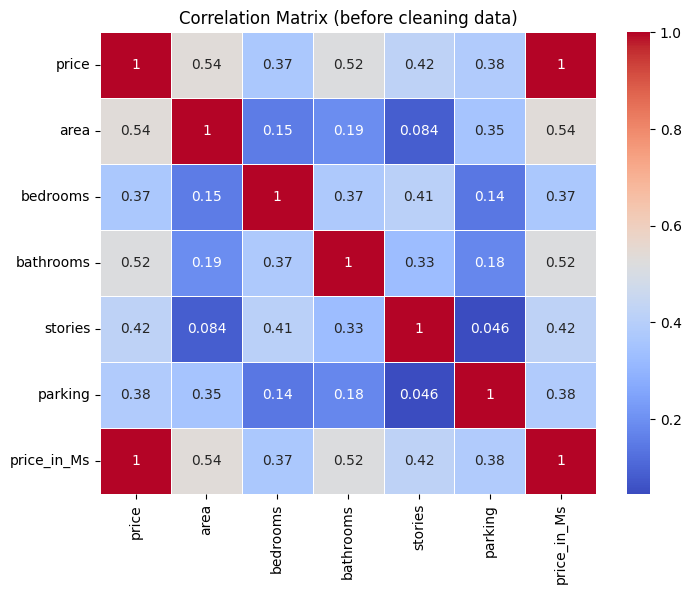

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (before cleaning data)')
plt.show()

### Correlation Matrix after cleaning data

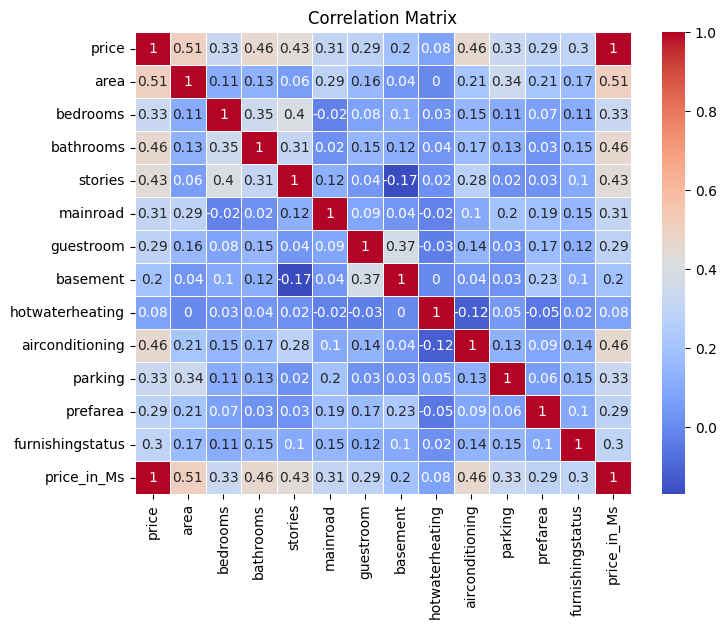

In [ ]:
## Correlation Matrix on the cleaned data, and after removing outliers
correlation_matrix2 = housing_data2.corr()
correlation_matrix2 = round(correlation_matrix2,2)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, fmt='.2g', annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


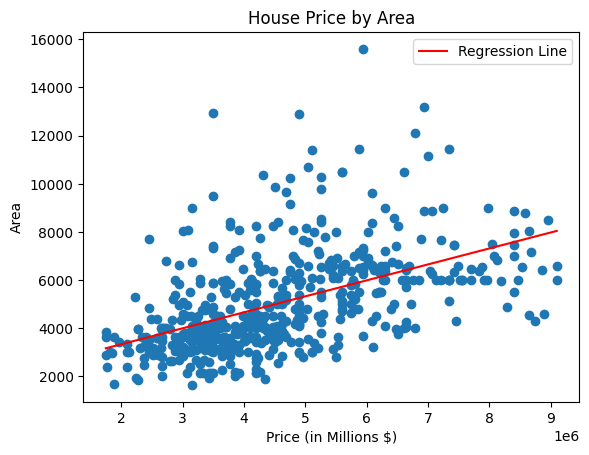

In [ ]:
# Scatter plot comparing house area in sq ft and house price
plt.scatter(housing_data2['price'], housing_data2['area'])
# Linear regression line
model = LinearRegression()
X = housing_data2[['price']]
y = housing_data2['area']
model.fit(X, y)
# Use the minimum and maximum values of both 'price' and 'area' to ensure the regression line extends
x_min, x_max = min(housing_data2['price']), max(housing_data2['price'])
y_min, y_max = min(housing_data2['area']), max(housing_data2['area'])
x_vals = np.linspace(x_min, x_max, 100)
y_vals = model.predict(x_vals.reshape(-1, 1))
plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.xlabel('Price (in Millions $)')
plt.ylabel('Area')
plt.title('House Price by Area')
plt.legend()
plt.show()

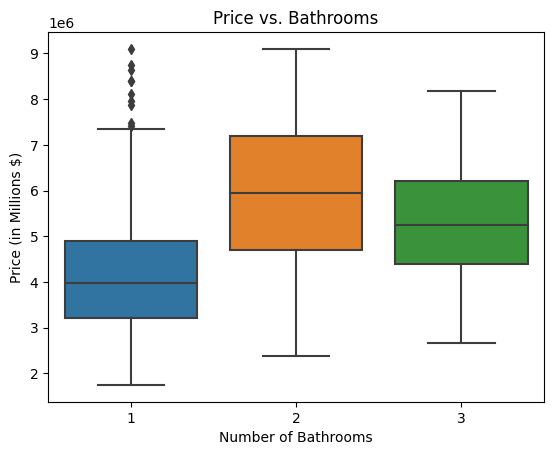

In [ ]:
# Comparing house price as the # of bathrooms increase
sns.boxplot(x='bathrooms', y='price', data=housing_data2)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in Millions $)')
plt.title('Price vs. Bathrooms')
plt.show()

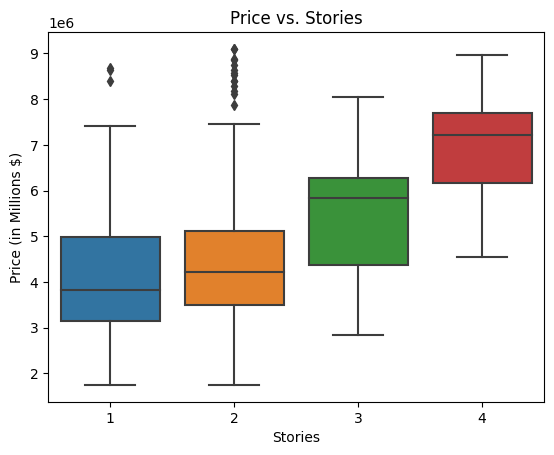

In [ ]:
#House price as the number of stories increase
sns.boxplot(x='stories', y='price', data=housing_data2)
plt.xlabel('Stories')
plt.ylabel('Price (in Millions $)')
plt.title('Price vs. Stories')
plt.show()

# Modeling

## Splitting data into Testing and Training Datasets

In [ ]:
# model 1
m1 = str('price ~ area + bedrooms + bathrooms + stories + parking + mainroad + guestroom + basement + hotwaterheating + airconditioning + prefarea')

# fit the model to the training set
train_m1_fit = smf.ols(m1, data = housing_data2).fit()
# summary of model fit to the training set
print(train_m1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     89.44
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          4.05e-112
Time:                        22:23:26   Log-Likelihood:                -8039.5
No. Observations:                 530   AIC:                         1.610e+04
Df Residuals:                     518   BIC:                         1.615e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.984e+05   2.17e+05     

In [ ]:
# model 2
m2 = str('price ~ area + bathrooms + stories + parking + mainroad + guestroom + basement + hotwaterheating + airconditioning + prefarea')

# fit the model to the training set
train_m2_fit = smf.ols(m2, data = housing_data2).fit()
# summary of model fit to the training set
print(train_m2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     98.03
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.00e-112
Time:                        22:23:28   Log-Likelihood:                -8040.4
No. Observations:                 530   AIC:                         1.610e+04
Df Residuals:                     519   BIC:                         1.615e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.712e+05   1.77e+05     

In [ ]:
# the independent variables set
X = housing_data2[['area', 'bathrooms', 'stories','parking', 'mainroad' , 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print("VIF is used to detect the severity of multicollinearity. The higher the VIF value, the more likely the variable is \nhighly correlated with other variables. \n")
print(vif_data)

VIF is used to detect the severity of multicollinearity. The higher the VIF value, the more likely the variable is 
highly correlated with other variables. 

           feature       VIF
0             area  7.610012
1        bathrooms  7.903354
2          stories  6.155176
3          parking  1.880898
4         mainroad  6.570350
5        guestroom  1.459643
6         basement  1.902865
7  hotwaterheating  1.074305
8  airconditioning  1.672321
9         prefarea  1.451524


In [ ]:
# model 3
m3 = str('price ~ area + stories + parking + mainroad + guestroom + basement + hotwaterheating + airconditioning + prefarea')

# fit the model to the training set
train_m3_fit = smf.ols(m3, data = housing_data2).fit()
# summary of model fit to the training set
print(train_m3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     88.48
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           5.87e-99
Time:                        22:23:32   Log-Likelihood:                -8075.5
No. Observations:                 530   AIC:                         1.617e+04
Df Residuals:                     520   BIC:                         1.621e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.056e+06   1.69e+05     

In [10]:
# the independent variables set
X = housing_data2[['area', 'bathrooms', 'stories','parking', 'mainroad' , 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print("VIF is used to detect the severity of multicollinearity. The higher the VIF value, the more likely the variable is \nhighly correlated with other variables. \n")
print(vif_data)

VIF is used to detect the severity of multicollinearity. The higher the VIF value, the more likely the variable is 
highly correlated with other variables. 

           feature       VIF
0             area  7.610012
1        bathrooms  7.903354
2          stories  6.155176
3          parking  1.880898
4         mainroad  6.570350
5        guestroom  1.459643
6         basement  1.902865
7  hotwaterheating  1.074305
8  airconditioning  1.672321
9         prefarea  1.451524


In [ ]:
X = housing_data2[['area', 'bathrooms', 'stories','parking', 'mainroad' , 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]
y = housing_data2['price']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())
y_pred = results.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("=================================================================================")
print("=================================================================================")

print(f"Mean Squared Error: {mse:,.2f}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     76.61
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.18e-87
Time:                        22:23:36   Log-Likelihood:                -6414.3
No. Observations:                 424   AIC:                         1.285e+04
Df Residuals:                     413   BIC:                         1.290e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.524e+05    1.9e+05     

In [11]:
X = housing_data2[['area', 'bathrooms', 'stories','parking', 'mainroad' , 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]
y = housing_data2['price']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())
y_pred = results.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("=================================================================================")
print("=================================================================================")

print(f"Mean Squared Error: {mse:,.2f}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     76.61
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.18e-87
Time:                        23:25:43   Log-Likelihood:                -6414.3
No. Observations:                 424   AIC:                         1.285e+04
Df Residuals:                     413   BIC:                         1.290e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.524e+05    1.9e+05     

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
# Separate features (X) and target variable (y)
X = housing_data2.drop(columns=['price', 'price_in_Ms'])
y = housing_data2['price']
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest model
model = RandomForestRegressor(n_estimators=100)
# Train
model.fit(X_train, y_train)
# predictions
y_pred = model.predict(X_test)
#MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:,.2f}")

Mean Squared Error: 1,266,873,572,918.27


In [ ]:
feature_names = X.columns
print(feature_names)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


In [ ]:
feature_importance = model.feature_importances_
print(feature_importance)

[0.47488173 0.04479408 0.12906101 0.06186042 0.01094687 0.02455786
 0.03849852 0.02385406 0.05447473 0.04530694 0.03343762 0.05832617]


## Decision Tree Model

In [ ]:

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

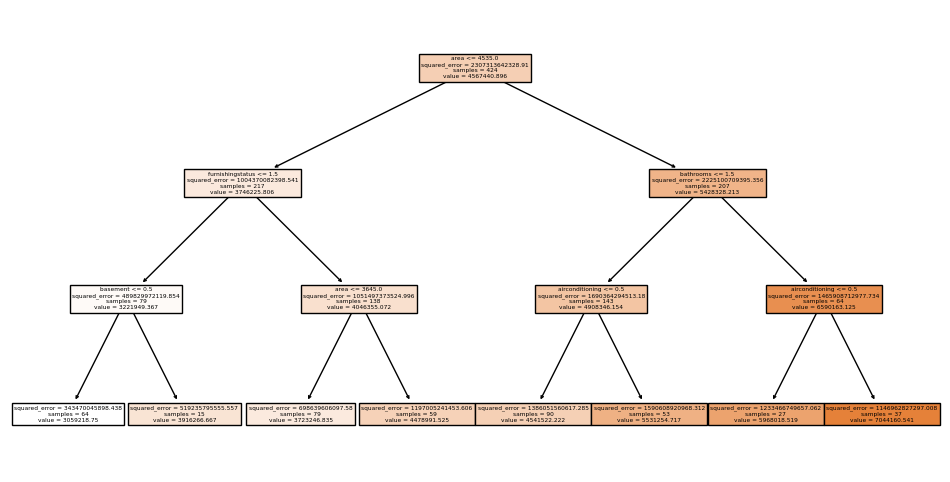

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
trees = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeRegressor(max_depth=3, random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    trees.append(pruned_tree)
accuracies = [tree.score(X_val, y_val) for tree in trees]
best_alpha = ccp_alphas[accuracies.index(max(accuracies))]
final_tree = DecisionTreeRegressor(max_depth=3, random_state=42, ccp_alpha=best_alpha)
final_tree.fit(X_train, y_train)
plt.figure(figsize=(12, 6))
plot_tree(final_tree, filled=True, feature_names=feature_names, class_names=True)
plt.show()


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:,.2f}")

Mean Squared Error: 1,835,698,930,667.92


# Deep Learning


In [ ]:
#neural networks using Keras
# Features
X = housing_data2.drop('price',axis=1)

# Label
y = housing_data2['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(371, 13)
(159, 13)
(371,)
(159,)


In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
3/3 [==============================] - 1s 120ms/step - loss: 23626686398464.0000 - val_loss: 23900700278784.0000
Epoch 2/400
3/3 [==============================] - 0s 31ms/step - loss: 23626688495616.0000 - val_loss: 23900698181632.0000
Epoch 3/400
3/3 [==============================] - 0s 18ms/step - loss: 23626686398464.0000 - val_loss: 23900698181632.0000
Epoch 4/400
3/3 [==============================] - 0s 17ms/step - loss: 23626684301312.0000 - val_loss: 23900698181632.0000
Epoch 5/400
3/3 [==============================] - 0s 17ms/step - loss: 23626682204160.0000 - val_loss: 23900696084480.0000
Epoch 6/400
3/3 [==============================] - 0s 28ms/step - loss: 23626682204160.0000 - val_loss: 23900696084480.0000
Epoch 7/400
3/3 [==============================] - 0s 21ms/step - loss: 23626682204160.0000 - val_loss: 23900693987328.0000
Epoch 8/400
3/3 [==============================] - 0s 28ms/step - loss: 23626682204160.0000 - val_loss: 23900691890176.0000
Epoch 9

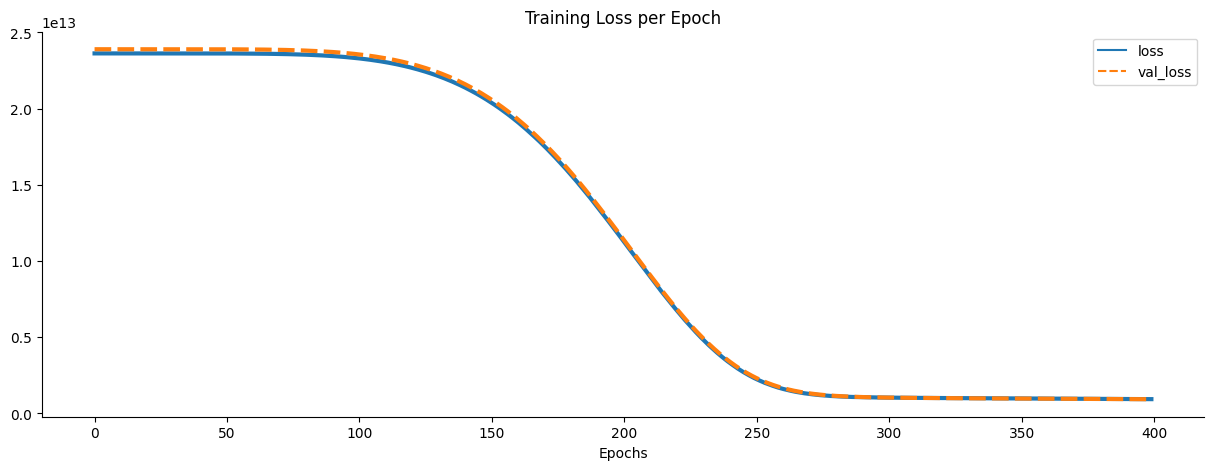

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',housing_data2['price'].describe())


5/5 [==============================] - 0s 2ms/step
MAE:  738008.5825471698
MSE:  931092074507.8282
RMSE:  964931.1242300293
Variance Regression Score:  0.6227548293623528


Descriptive Statistics:
 count    5.300000e+02
mean     4.600663e+06
std      1.596119e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.270000e+06
75%      5.600000e+06
max      9.100000e+06
Name: price, dtype: float64


<ipython-input-55-eb57a536dd87>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

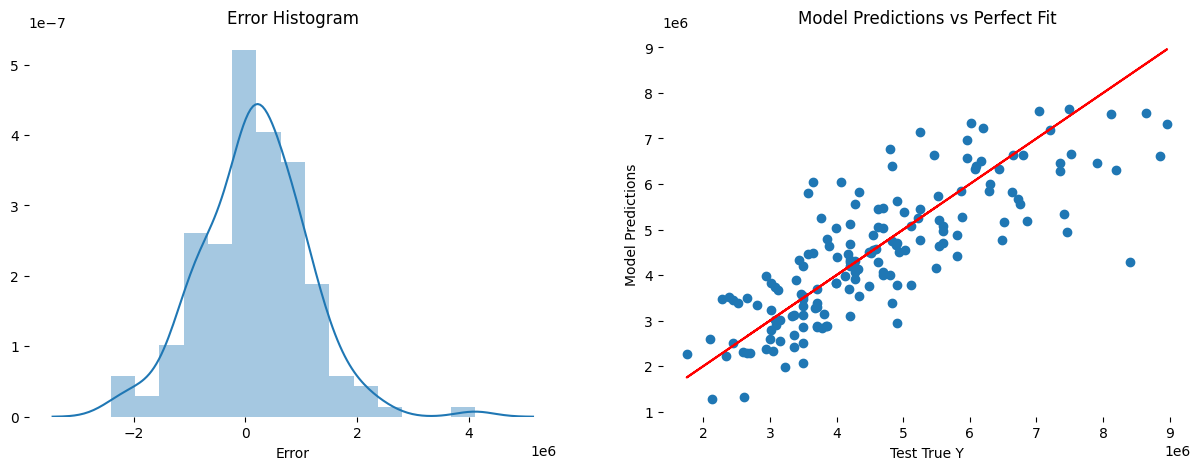

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(159, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [ ]:
# features of new house
single_house = housing_data2.drop('price',axis=1).iloc[150]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 13))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',housing_data2.iloc[150]['price'])

Features of new house:
area                6450.000
bedrooms               3.000
bathrooms              2.000
stories                1.000
mainroad               1.000
guestroom              1.000
basement               1.000
hotwaterheating        1.000
airconditioning        0.000
parking                0.000
prefarea               0.000
furnishingstatus       1.000
price_in_Ms            5.383
Name: 150, dtype: float64
1/1 [==============================] - 0s 55ms/step

Prediction Price: 5750323.0

Original Price: 5383000.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
# Convert binary string columns to numerical
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [ ]:
# Convert 'furnishingstatus' into dummy variables
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

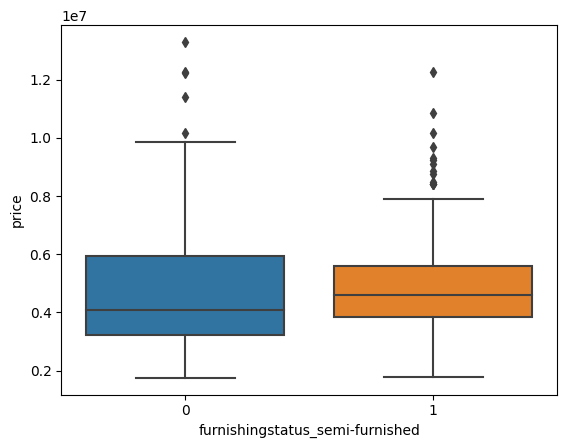

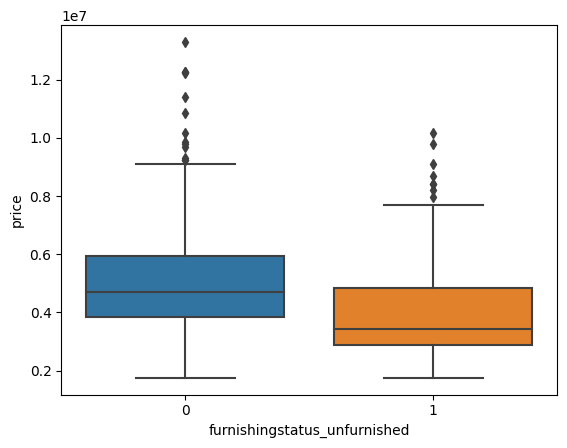

In [ ]:
# For categorical data
sns.boxplot(x='furnishingstatus_semi-furnished', y='price', data=df)
plt.show()
sns.boxplot(x='furnishingstatus_unfurnished', y='price', data=df)
plt.show()

In [ ]:
# Splitting the data into training and validation sets (80% train, 20% validation)
X = df.drop('price', axis=1)  # Features (all columns except 'price')
y = df['price']  # Target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting on the validation set
y_pred = model.predict(X_val)

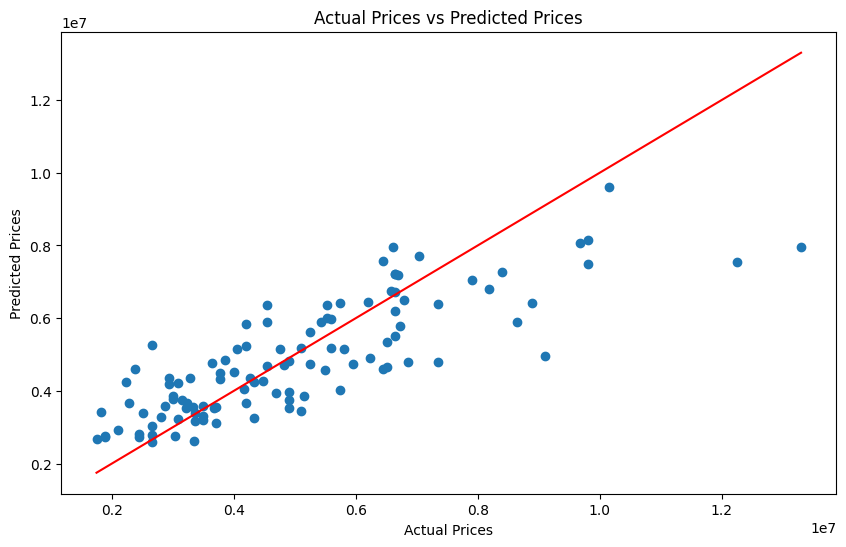

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_val, y_pred)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red') # a red line for perfect fit
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

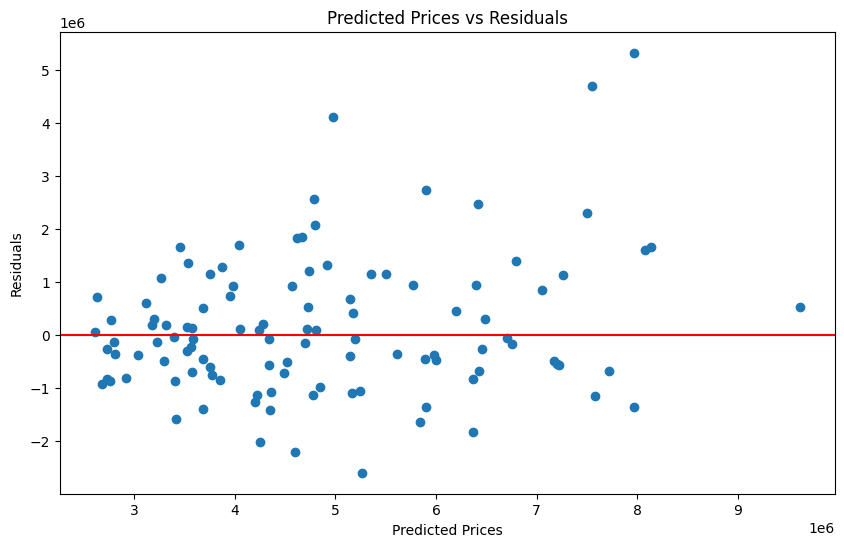

In [ ]:
residuals = y_val - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Predicted Prices vs Residuals')
plt.show()

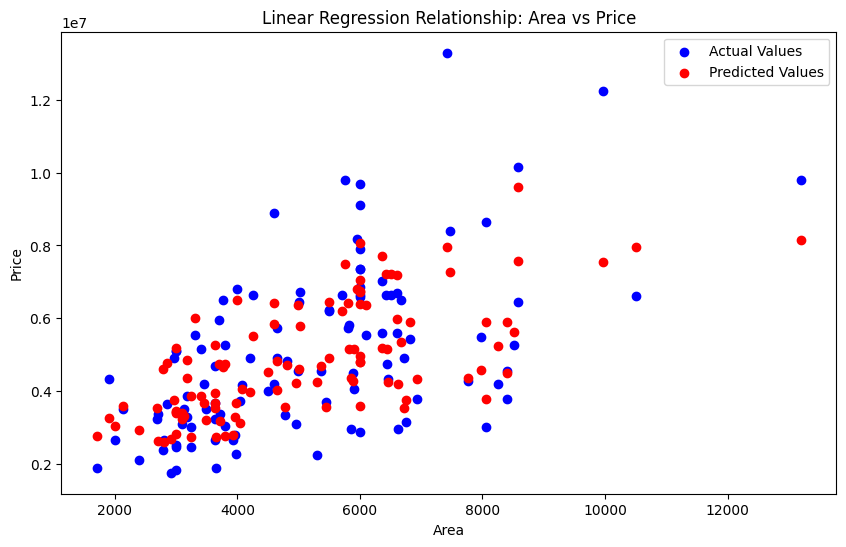

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_val['area'], y_val, color='blue', label='Actual Values')
plt.scatter(X_val['area'], y_pred, color='red', label='Predicted Values')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression Relationship: Area vs Price')
plt.legend()
plt.show()

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 1754318687330.66
Root Mean Squared Error: 1324506.96
R^2 Score: 0.65


In [ ]:
# To view the coefficients for each feature
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
mainroad                         3.679199e+05
guestroom                        2.316100e+05
basement                         3.902512e+05
hotwaterheating                  6.846499e+05
airconditioning                  7.914267e+05
parking                          2.248419e+05
prefarea                         6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05
